In [1]:
import re
from matplotlib import pyplot as plt

with open("output.txt", "r") as file:
    lines = file.readlines()

trajectories = []
current_traj = 0

step_size_arr = []
num_steps_arr = []

for line in lines:
    line = line.strip()


    if line.startswith("# NUM_STEPS"):
        num_steps = int(line.split()[-1])
        num_steps_arr.append(num_steps)
    elif line.startswith("# STEP_SIZE"):
        step_size = float(line.split()[-1])
        step_size_arr.append(step_size)
    else:
        values = list(map(float, line.split())) 
        trajectories.append(values)
        current_traj += 1

print("Number of trajectories: ", current_traj)

Number of trajectories:  2


In [2]:
import numpy as np
def pot(x):
    return (x**2 - 1) ** 2

beta = 1.0

def invariant_dist(x):
    return np.exp( beta * -pot(x))

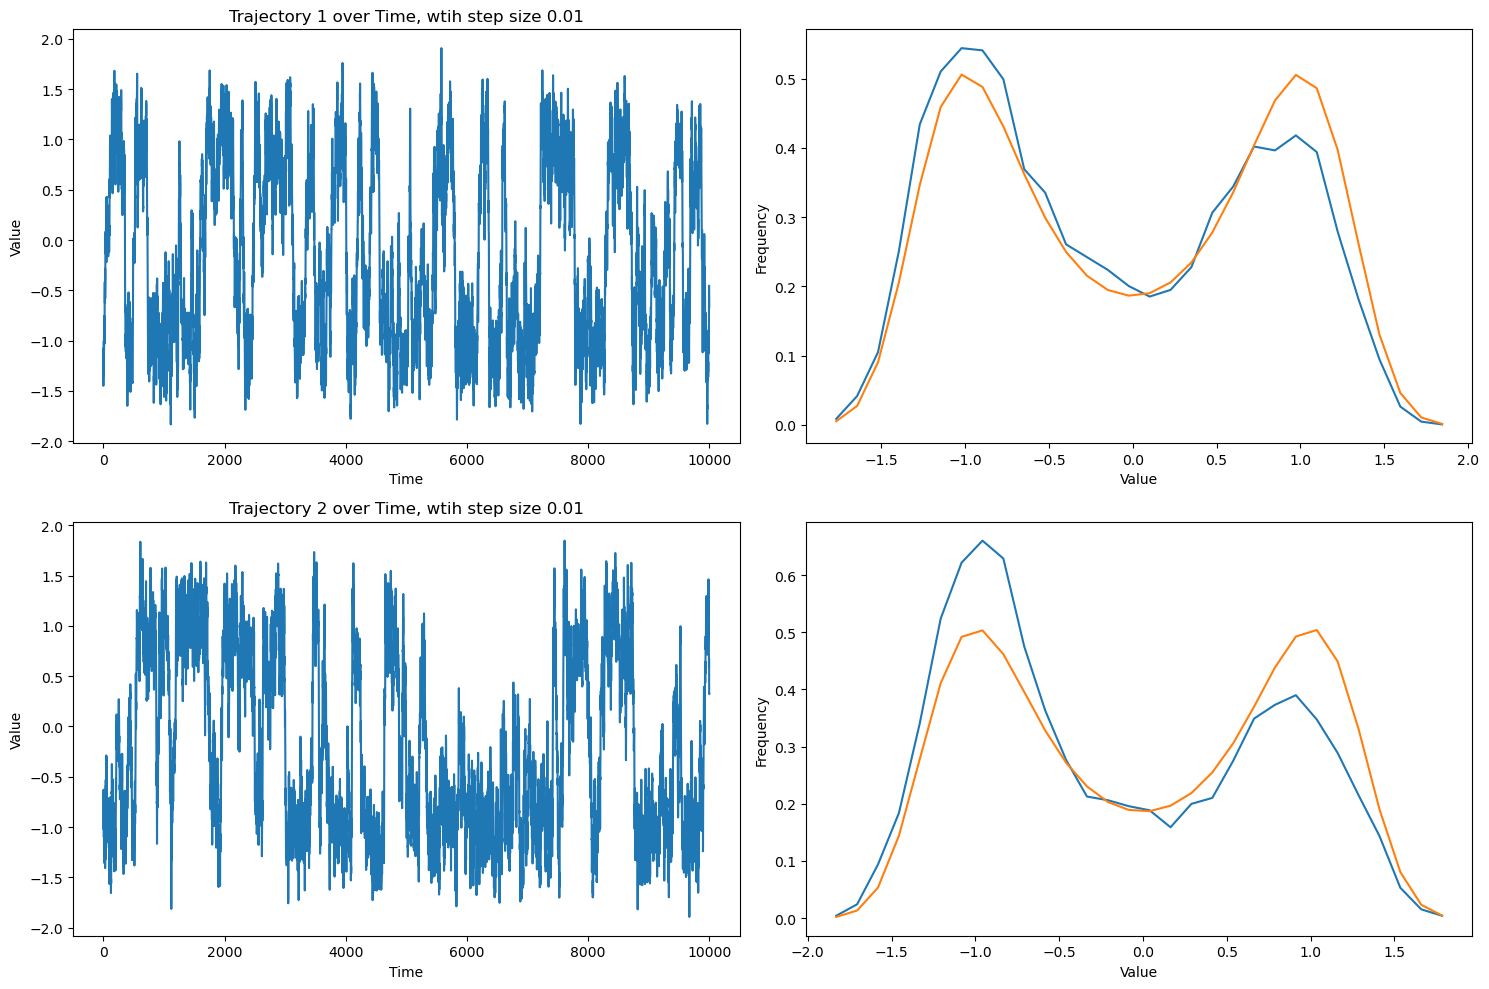

In [6]:
from scipy.stats import wasserstein_distance

wasserstein_distances = []

# show trajectories with respect to time
fig, axs = plt.subplots(len(trajectories), 2, figsize=(15, 5 * len(trajectories)))

for i, (step_s, traj) in enumerate(zip(step_size_arr, trajectories)):
    # Plot trajectory
    axs[i, 0].plot(traj)
    axs[i, 0].set_title(f'Trajectory {i + 1} over Time, wtih step size {step_s}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Value')
    
    # Plot histogram
    # axs[i, 1].hist(traj, bins=20)
    hist, bins = np.histogram(traj, bins=30, density=True)
    midx = (bins[1:] + bins[:-1]) / 2
    rho = np.exp(-beta * pot(midx))
    rho = rho / (rho.sum() * (midx[1] - midx[0]))
    axs[i, 1].plot(midx, hist, label='Empirical')
    axs[i, 1].plot(midx, rho, label='Theoretical')
    # axs[i, 1].set_title(f'Histogram of Trajectory {i + 1}, with step size {step_s}')
    axs[i, 1].set_xlabel('Value')
    axs[i, 1].set_ylabel('Frequency')

    # Calculate Wasserstein distance
    wasserstein_distances.append(wasserstein_distance(hist, rho))

plt.tight_layout()
plt.show()

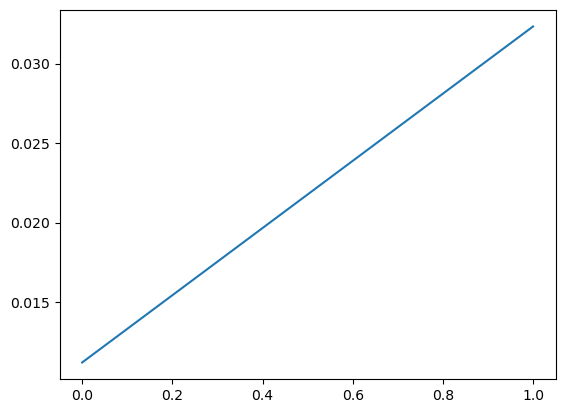

In [8]:
# show how the wasserstein distance changes with respect to the step size
plt.plot(wasserstein_distances)